<a href="https://colab.research.google.com/github/DonRoboto/AprendizajeAutomatizado/blob/master/Tarea3/Tarea3_ej1c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cargamos librerias

In [0]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import seaborn as sns

Definimos la funcion para entrenar y evaluar el modelo

In [0]:
def fit_eval(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors, cv_errors = [], [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        scores = cross_val_score(model, X, y,scoring="neg_mean_squared_error", cv=5)
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        cv_errors.append(scores.mean())
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    et=sum(train_errors)/len(train_errors) 
    ev=sum(val_errors)/len(val_errors) 
    cv=sum(cv_errors)/len(cv_errors) 
    return et, ev, cv    

Cargamos los datos

In [0]:
url_data = 'https://raw.githubusercontent.com/DonRoboto/AprendizajeAutomatizado/master/Tarea3/housing.data'
dataframe = pd.read_csv(url_data,header=None, delimiter=r"\s+")

Graficamos para observar aquellas columnas que guardan una mayor correlacion con la variable target

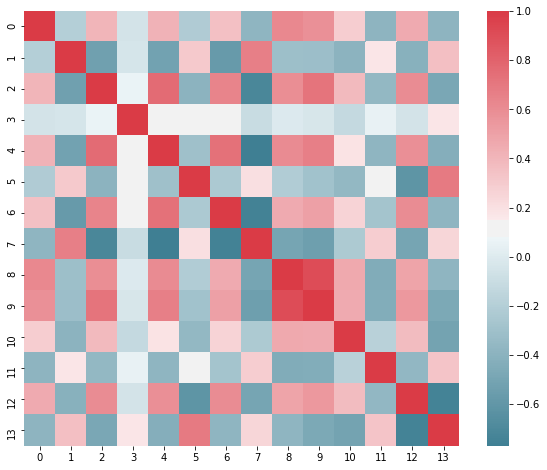

In [36]:
f, ax = plt.subplots(figsize=(10, 8))
corr = dataframe.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
               square=True, ax=ax)

Seleccionando aquellas características que tienen una mayor correlacion

In [0]:
df=dataframe.to_numpy()
df=df[:,0:14]

X1 = np.array([df[:, 1]]).transpose()
X3 = np.array([df[:, 3]]).transpose()
X5 = np.array([df[:, 5]]).transpose()
X7 = np.array([df[:, 7]]).transpose()
X11 = np.array([df[:, 11]]).transpose()
X = np.hstack((X1, X3, X5, X7, X11))

y = df[:,13]


Error en Entrenamiento: 23.078558930814147
Error en Validación: 34399.392067324654
Error en Validación Cruzada: -193.95499086896587


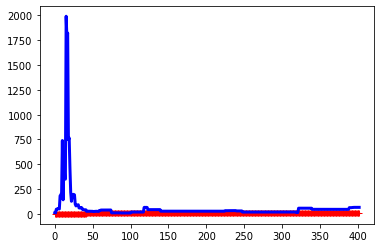

In [38]:
polynomial_regression = Pipeline([
                ("poly_features", PolynomialFeatures(degree=20, interaction_only=True, include_bias=False)),
                ("lin_reg_ridge", LinearRegression()),
                ])


et, ev, cv = fit_eval(polynomial_regression, X, y)
print("Error en Entrenamiento: {}".format(et))
print("Error en Validación: {}".format(ev))
print("Error en Validación Cruzada: {}".format(cv))